# Prerequisites

## Install Library

In [74]:
# for python 3.11.4
%pip install -r requirements.txt


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python3.11 -m pip install --upgrade pip

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## Import Library

In [75]:
## Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from autogluon.tabular import TabularPredictor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, make_scorer, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import roc_curve, auc, confusion_matrix, precision_recall_curve, ConfusionMatrixDisplay, average_precision_score, cohen_kappa_score
from sklearn.model_selection import train_test_split
import json
import joblib
import warnings
warnings.filterwarnings("ignore")

## Read Data

In [76]:
df = pd.read_csv("/Users/thanyalak/Desktop/y_lims/DADS4/9000_IS_FraudDetection/repos/Credit_Card_Fraud_Detection/data/fraudTrain_cleaned.csv", index_col=0)

In [77]:
# Convert trans_date_trans_time to datetime
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

In [78]:
df.head()

,trans_date_trans_time,cc_num,merchant,amt,first,last,gender,street,city,state,...,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,distance
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
0,2019-01-01 00:00:18,2703186189652095,514,4.97,Jennifer,Banks,0,561 Perry Cove,526,27,...,0,0,0,1,0,0,0,0,0,78.773821
1,2019-01-01 00:00:44,630423337322,241,107.23,Stephanie,Gill,0,43039 Riley Greens Suite 393,612,47,...,0,0,0,0,0,0,0,0,0,30.216618
2,2019-01-01 00:00:51,38859492057661,390,220.11,Edward,Sanchez,1,594 White Dale Suite 530,468,13,...,0,0,0,0,0,0,0,0,0,108.102912
3,2019-01-01 00:01:16,3534093764340240,360,45.00,Jeremy,White,1,9443 Cynthia Court Apt. 038,84,26,...,0,0,0,0,0,0,0,0,0,95.685115
4,2019-01-01 00:03:06,375534208663984,297,41.96,Tyler,Garcia,1,408 Bradley Rest,216,45,...,0,0,0,0,1,0,0,0,0,77.702395


In [79]:
df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'amt', 'first', 'last',
       'gender', 'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop',
       'job', 'dob', 'trans_num', 'unix_time', 'merch_lat', 'merch_long',
       'is_fraud', 'age', 'hour', 'day', 'month', 'year', 'is_weekend',
       'is_weekday', 'time_diff', 'diff_days', 'diff_hours', 'diff_minutes',
       'diff_seconds', 'category_entertainment', 'category_food_dining',
       'category_gas_transport', 'category_grocery_net',
       'category_grocery_pos', 'category_health_fitness', 'category_home',
       'category_kids_pets', 'category_misc_net', 'category_misc_pos',
       'category_personal_care', 'category_shopping_net',
       'category_shopping_pos', 'category_travel', 'distance'],
      dtype='object')

In [80]:
df.dtypes

trans_date_trans_time      datetime64[ns]
cc_num                              int64
merchant                            int64
amt                               float64
first                              object
last                               object
gender                              int64
street                             object
city                                int64
state                               int64
zip                                 int64
lat                               float64
long                              float64
city_pop                            int64
job                                 int64
dob                                object
trans_num                          object
unix_time                           int64
merch_lat                         float64
merch_long                        float64
is_fraud                            int64
age                                 int64
hour                                int64
day                               

In [81]:
df.isnull().sum()

trans_date_trans_time      0
cc_num                     0
merchant                   0
amt                        0
first                      0
last                       0
gender                     0
street                     0
city                       0
state                      0
zip                        0
lat                        0
long                       0
city_pop                   0
job                        0
dob                        0
trans_num                  0
unix_time                  0
merch_lat                  0
merch_long                 0
is_fraud                   0
age                        0
hour                       0
day                        0
month                      0
year                       0
is_weekend                 0
is_weekday                 0
time_diff                  0
diff_days                  0
diff_hours                 0
diff_minutes               0
diff_seconds               0
category_entertainment     0
category_food_

In [82]:
df_all = df.copy()

# Time-based split
split_time = df_all['trans_date_trans_time'].quantile(0.8)
df_train = df_all[df_all['trans_date_trans_time'] < split_time]
df_test = df_all[df_all['trans_date_trans_time'] >= split_time]

split_time_val = df_train['trans_date_trans_time'].quantile(0.8)
df_train_final = df_train[df_train['trans_date_trans_time'] < split_time_val]
df_val = df_train[df_train['trans_date_trans_time'] >= split_time_val]

# Remove unnecessary columns
columns_to_exclude = ['first', 'last', 'street', 'trans_date_trans_time', 'dob', 'trans_num']

for col in columns_to_exclude:
    if col in df_train_final.columns:
        df_train_final = df_train_final.drop(col, axis=1)
    if col in df_val.columns:
        df_val = df_val.drop(col, axis=1)
    if col in df_test.columns:
        df_test = df_test.drop(col, axis=1)

print(f"Training set shape: {df_train_final.shape}")
print(f"Validation set shape: {df_val.shape}")
print(f"Test set shape: {df_test.shape}")

Training set shape: (829872, 42)
Validation set shape: (207468, 42)
Test set shape: (259335, 42)


In [83]:
df_train_final.shape, df_val.shape, df_test.shape

((829872, 42), (207468, 42), (259335, 42))

# Model Pipeline

## AutoGluon

### Model Training

In [ ]:
# Configure AutoGluon with simplified and stable configuration
predictor = TabularPredictor(
    label='is_fraud',
    eval_metric='precision',
    path='/Users/thanyalak/Desktop/y_lims/DADS4/9000_IS_FraudDetection/repos/Credit_Card_Fraud_Detection/ml_training/single_sequential_version/models/Classification/autogluon_output'
).fit(
    train_data=df_train_final,
    tuning_data=df_val,
    time_limit=600,  # Reduced time for stability

    # Basic configuration without complex hyperparameters
    presets='medium_quality',  # Use preset for reliable configuration

    # Simple validation strategy
    num_bag_folds=3,  # Reduced folds for faster training
    num_bag_sets=1,
    num_stack_levels=0,  # Disable stacking to avoid complexity

    # Focus on stable models
    excluded_model_types=['NN_TORCH', 'FASTAI'],  # Exclude neural networks for stability
)

Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.3.1
Python Version:     3.11.4
Operating System:   Darwin
Platform Machine:   arm64
Platform Version:   Darwin Kernel Version 23.6.0: Mon Jul 29 21:14:21 PDT 2024; root:xnu-10063.141.2~1/RELEASE_ARM64_T8103
CPU Count:          8
Memory Avail:       2.81 GB / 16.00 GB (17.6%)
Disk Space Avail:   78.14 GB / 460.43 GB (17.0%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets. Defaulting to `'medium'`...
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='experimental' : New in v1.2: Pre-trained foundation model + parallel fits. The absolute best accuracy without consideration for inference speed. Does not support GPU.
	presets='best'         : Maximize accuracy. Recommended for most users. Use in competitions and benchmarks.
	presets='high

In [85]:
predictor.leaderboard(df_test, silent=True)

,model,score_test,score_val,eval_metric,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L3,1.000000,1.000000,precision,6.520620,192.239455,484.852222,0.010250,0.261219,29.802010,3,True,6
1,RandomForest_BAG_L1,0.987288,0.988308,precision,1.051012,26.967657,133.399948,1.051012,26.967657,133.399948,1,True,1
2,ExtraTrees_BAG_L2,0.986267,0.988515,precision,6.510370,191.978236,455.050212,1.746763,60.385306,115.986570,2,True,5
3,RandomForest_BAG_L2,0.949524,0.944918,precision,5.193499,148.793879,423.678304,0.429892,17.200949,84.614662,2,True,4
4,ExtraTrees_BAG_L1,0.000000,0.000000,precision,3.712595,104.625273,205.663694,3.712595,104.625273,205.663694,1,True,2
5,WeightedEnsemble_L2,0.000000,1.000000,precision,4.774250,131.863411,352.012413,0.010643,0.270481,12.948771,2,True,3


### Evaluate and Compare The Results

In [86]:
performance = predictor.evaluate(df_test)
print(performance)

{'precision': 0.0, 'accuracy': 0.9940694468544546, 'balanced_accuracy': 0.5, 'mcc': 0.0, 'roc_auc': 0.9718395969494309, 'f1': 0.0, 'recall': 0.0}


In [87]:
# --- Predict on test set ---
y_true = df_test['is_fraud'].values
y_proba = predictor.predict_proba(df_test)[1].values  # probability for class 1 (fraud)

# Find optimal threshold for precision
best_precision = 0
optimal_threshold = 0.5

thresholds_to_test = np.arange(0.1, 0.9, 0.05)
for threshold in thresholds_to_test:
    y_pred_temp = (y_proba >= threshold).astype(int)
    if sum(y_pred_temp) > 0:  # Avoid division by zero
        precision_temp = precision_score(y_true, y_pred_temp, zero_division=0)
        if precision_temp > best_precision:
            best_precision = precision_temp
            optimal_threshold = threshold

print(f"Optimal threshold (Precision-optimized): {optimal_threshold:.4f}")
print(f"Best Precision: {best_precision:.4f}")

# Use optimal threshold for final predictions
y_pred = (y_proba >= optimal_threshold).astype(int)

print(f"\nPrediction results with optimal threshold:")
print(f"Predicted non-fraud: {sum(y_pred == 0)}")
print(f"Predicted fraud: {sum(y_pred == 1)}")

Optimal threshold (Precision-optimized): 0.3500
Best Precision: 1.0000

Prediction results with optimal threshold:
Predicted non-fraud: 259002
Predicted fraud: 333
Predicted non-fraud: 259002
Predicted fraud: 333


Classification Report

In [88]:
# Evaluate on test set
print(classification_report(y_true, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9953    1.0000    0.9977    257797
           1     1.0000    0.2165    0.3560      1538

    accuracy                         0.9954    259335
   macro avg     0.9977    0.6083    0.6768    259335
weighted avg     0.9954    0.9954    0.9939    259335



Confusion Matrix

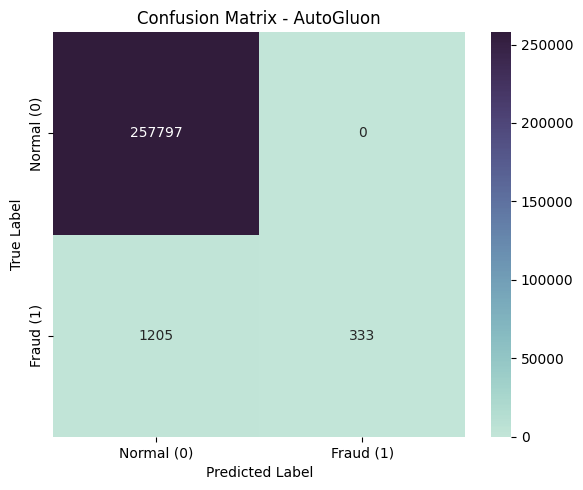

In [89]:
cm = confusion_matrix(y_true, y_pred)
labels = ['Normal (0)', 'Fraud (1)']
plt.figure(figsize=(6, 5))
cubehelix_cmap = sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True)
sns.heatmap(cm, annot=True, fmt='d', cmap=cubehelix_cmap, xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix - AutoGluon')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

In [90]:
metrics = {
    "Method": ["AutoGluon"],
    "Precision": [
        precision_score(y_true, y_pred)
    ],
    "Recall": [
        recall_score(y_true, y_pred)
    ],
    "F1-Score": [
        f1_score(y_true, y_pred)
    ],
    "ROC-AUC": [
        roc_auc_score(y_true, y_proba)
    ],
    "PR-AUC": [
        average_precision_score(y_true, y_proba)
    ],
    "Cohen Kappa": [
        cohen_kappa_score(y_true, y_pred)
    ]
}

df_metrics = pd.DataFrame(metrics)
display(df_metrics)

,Method,Precision,Recall,F1-Score,ROC-AUC,PR-AUC,Cohen Kappa
0,AutoGluon,1.0,0.216515,0.355959,0.97184,0.779795,0.354597


ROC Curve

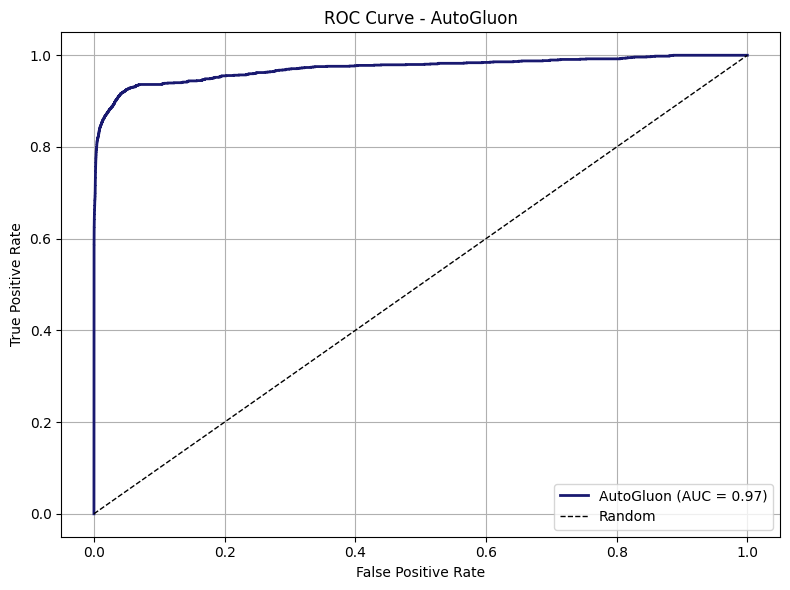

In [91]:
# --- Display ROC Curve ---
fpr, tpr, thresholds = roc_curve(y_true, y_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='midnightblue', lw=2, label=f'AutoGluon (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=1, label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - AutoGluon')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

Precision-Recall Curve

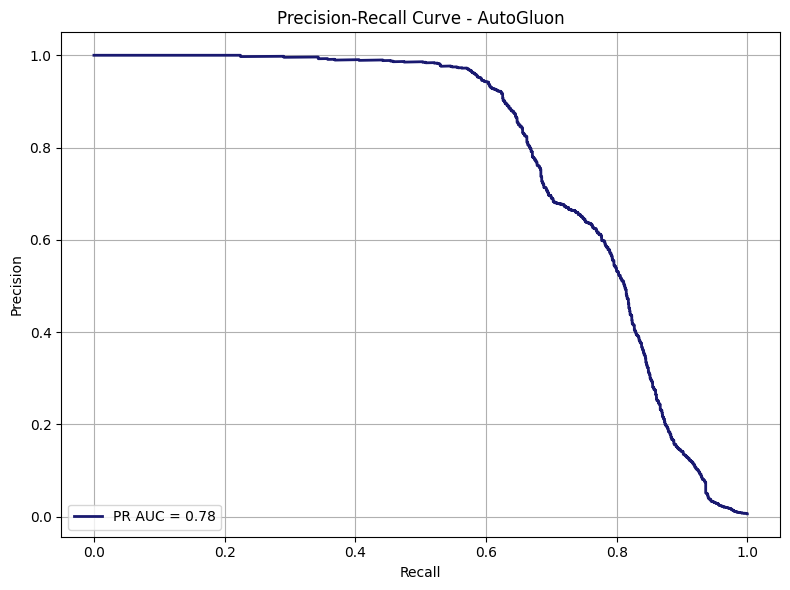

In [92]:
# --- Display Precision-Recall Curve ---
precision, recall, thresholds = precision_recall_curve(y_true, y_proba)
pr_auc = average_precision_score(y_true, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='midnightblue', lw=2, label=f'PR AUC = {pr_auc:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - AutoGluon')
plt.legend(loc='lower left')
plt.grid(True)
plt.tight_layout()
plt.show()

Metrics Comparison

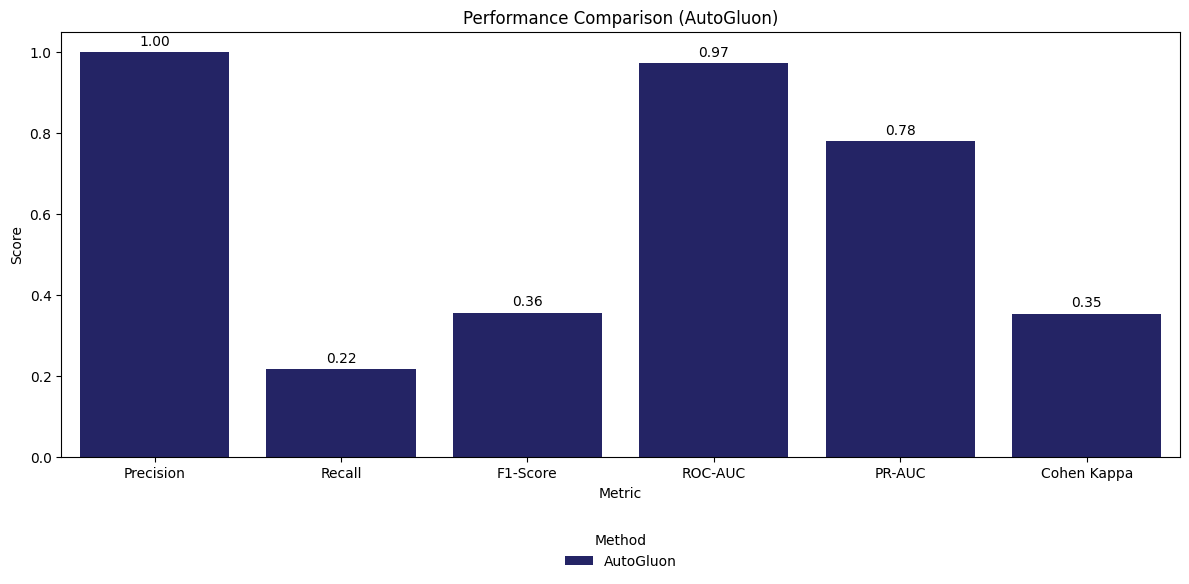

In [93]:
# --- Display Metrics Comparison ---
metrics = {
    "Method": ["AutoGluon"],
    "Precision": [precision_score(y_true, y_pred)],
    "Recall": [recall_score(y_true, y_pred)],
    "F1-Score": [f1_score(y_true, y_pred)],
    "ROC-AUC": [roc_auc],
    "PR-AUC": [pr_auc],
    "Cohen Kappa": [cohen_kappa_score(y_true, y_pred)]
}
df_metrics = pd.DataFrame(metrics)
df_melt = df_metrics.melt(id_vars="Method", var_name="Metric", value_name="Score")
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df_melt, x="Metric", y="Score", hue="Method", palette=["midnightblue"])
for p in ax.patches:
    height = p.get_height()
    if not np.isnan(height):
        ax.text(
            p.get_x() + p.get_width() / 2.,
            height + 0.01,
            f'{height:.2f}',
            ha="center", va="bottom"
        )
plt.title("Performance Comparison (AutoGluon)")
plt.ylabel("Score")
plt.ylim(0, 1.05)
plt.legend(
    title="Method",
    loc='upper center',
    bbox_to_anchor=(0.5, -0.15),
    ncol=3,
    frameon=False
)
plt.tight_layout()
plt.grid(False)
plt.show()

Overfitting Plot

=== Comprehensive Overfitting Analysis ===
F1 Gap: -0.3481
Precision Gap: 0.0000
Recall Gap: -0.2126
ROC-AUC Gap: 0.0062
PR-AUC Gap: 0.0171
⚠️  Significant overfitting detected


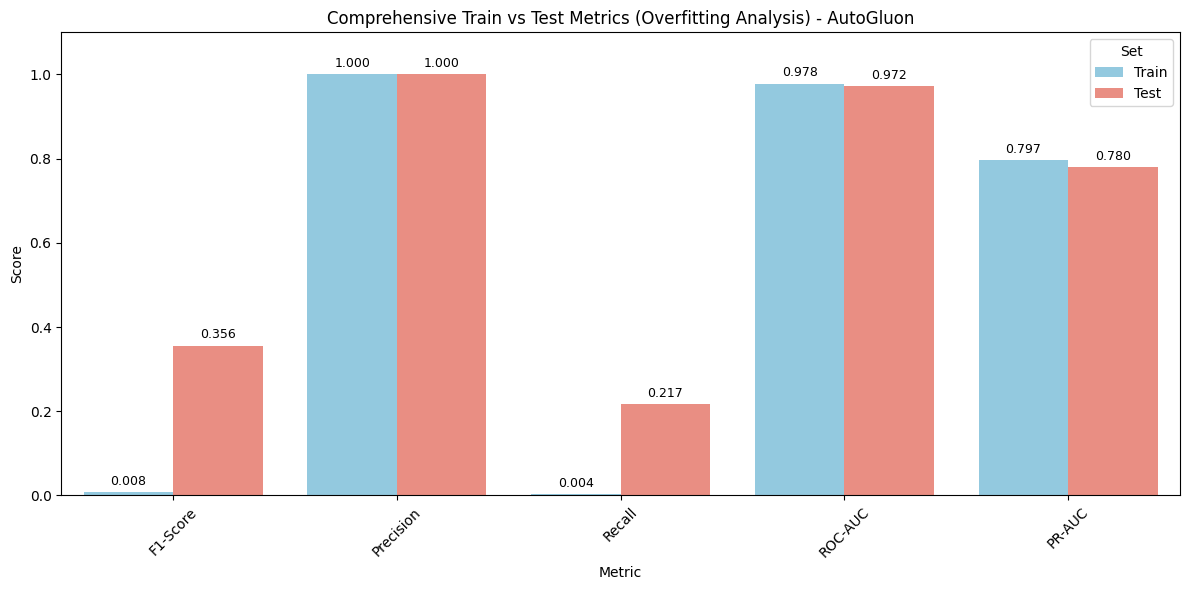

In [94]:
# --- Train set ---
y_train_true = df_train_final['is_fraud'].values
y_train_pred = predictor.predict(df_train_final).values
y_train_proba = predictor.predict_proba(df_train_final)[1].values

# Calculate comprehensive metrics
train_f1 = f1_score(y_train_true, y_train_pred)
train_recall = recall_score(y_train_true, y_train_pred)
train_precision = precision_score(y_train_true, y_train_pred)
train_roc_auc = roc_auc_score(y_train_true, y_train_proba)
train_pr_auc = average_precision_score(y_train_true, y_train_proba)

# --- Test set ---
test_f1 = f1_score(y_true, y_pred)
test_recall = recall_score(y_true, y_pred)
test_precision = precision_score(y_true, y_pred)
test_roc_auc = roc_auc_score(y_true, y_proba)
test_pr_auc = average_precision_score(y_true, y_proba)

# Overfitting analysis
print("=== Comprehensive Overfitting Analysis ===")
print(f"F1 Gap: {train_f1 - test_f1:.4f}")
print(f"Precision Gap: {train_precision - test_precision:.4f}")
print(f"Recall Gap: {train_recall - test_recall:.4f}")
print(f"ROC-AUC Gap: {train_roc_auc - test_roc_auc:.4f}")
print(f"PR-AUC Gap: {train_pr_auc - test_pr_auc:.4f}")

# Determine overfitting level
gaps = [abs(train_f1 - test_f1), abs(train_precision - test_precision),
        abs(train_recall - test_recall), abs(train_roc_auc - test_roc_auc)]
avg_gap = np.mean(gaps)

if avg_gap > 0.1:
    print("⚠️  Significant overfitting detected")
elif avg_gap > 0.05:
    print("⚡ Moderate overfitting")
else:
    print("✅ Good generalization")

# Enhanced visualization
df_overfit = pd.DataFrame({
    "Metric": ["F1-Score", "Precision", "Recall", "ROC-AUC", "PR-AUC"],
    "Train": [train_f1, train_precision, train_recall, train_roc_auc, train_pr_auc],
    "Test": [test_f1, test_precision, test_recall, test_roc_auc, test_pr_auc]
})
df_overfit = df_overfit.melt(id_vars="Metric", var_name="Set", value_name="Score")

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df_overfit, x="Metric", y="Score", hue="Set", palette=["skyblue", "salmon"])
for p in ax.patches:
    height = p.get_height()
    if not np.isnan(height):
        ax.text(
            p.get_x() + p.get_width() / 2.,
            height + 0.01,
            f'{height:.3f}',
            ha="center", va="bottom", fontsize=9
        )
plt.title("Comprehensive Train vs Test Metrics (Overfitting Analysis) - AutoGluon")
plt.ylim(0, 1.1)
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(False)
plt.legend(title='Set', loc="upper right")
plt.show()

### 2.3 Save Model

In [95]:
# Save predictor (AutoGluon จะ save เป็นไฟล์ใน path ที่กำหนด)
predictor.save()

# Save optimal threshold for inference
import os
model_dir = "/Users/thanyalak/Desktop/y_lims/DADS4/9000_IS_FraudDetection/repos/Credit_Card_Fraud_Detection/ml_training/single_sequential_version/models/Classification/autogluon_output"
with open(os.path.join(model_dir, "optimal_threshold.joblib"), "wb") as f:
    joblib.dump(optimal_threshold, f)

print(f"Model and optimal threshold saved! Threshold: {optimal_threshold:.4f}")

TabularPredictor saved. To load, use: predictor = TabularPredictor.load("/Users/thanyalak/Desktop/y_lims/DADS4/9000_IS_FraudDetection/repos/Credit_Card_Fraud_Detection/ml_training/single_sequential_version/models/Classification/autogluon_output")


Model and optimal threshold saved! Threshold: 0.3500


# Model Testing

In [96]:
df = pd.read_csv("/Users/thanyalak/Desktop/y_lims/DADS4/9000_IS_FraudDetection/repos/Credit_Card_Fraud_Detection/data/fraudTest_cleaned.csv", index_col=0)
predictor = TabularPredictor.load("/Users/thanyalak/Desktop/y_lims/DADS4/9000_IS_FraudDetection/repos/Credit_Card_Fraud_Detection/ml_training/single_sequential_version/models/Classification/autogluon_output")

# Load optimal threshold
try:
    with open("/Users/thanyalak/Desktop/y_lims/DADS4/9000_IS_FraudDetection/repos/Credit_Card_Fraud_Detection/ml_training/single_sequential_version/models/Classification/autogluon_output/optimal_threshold.joblib", "rb") as f:
        optimal_threshold_loaded = joblib.load(f)
    print(f"Loaded optimal threshold: {optimal_threshold_loaded:.4f}")
except:
    optimal_threshold_loaded = 0.5
    print("Using default threshold: 0.5")

Loaded optimal threshold: 0.3500


In [97]:
# Random sample for testing
sample_df = df.sample(100).copy()

# Remove same columns as in training
columns_to_exclude = ['first', 'last', 'street', 'trans_date_trans_time', 'dob', 'trans_num']
for col in columns_to_exclude:
    if col in sample_df.columns:
        sample_df = sample_df.drop(col, axis=1)

print(f"Sample data shape: {sample_df.shape}")

# Use precision-optimized threshold for predictions
preds_proba = predictor.predict_proba(sample_df)
sample_df['fraud_probability'] = preds_proba[1].values
sample_df['predicted_result'] = (preds_proba[1].values >= optimal_threshold_loaded).astype(int)

print(f"Used precision-optimized threshold: {optimal_threshold_loaded:.4f}")
print(f"Fraud cases detected: {sum(sample_df['predicted_result'])}")

Sample data shape: (100, 42)
Used precision-optimized threshold: 0.3500
Fraud cases detected: 0
Used precision-optimized threshold: 0.3500
Fraud cases detected: 0


In [98]:
# Display results
columns_to_show = [
'trans_date_trans_time', 'trans_num', 'cc_num',  'first', 'last', 'merchant', 'amt',
    'is_fraud', 'predicted_result', 'fraud_probability'
]

# Filter columns that actually exist in the dataframe
available_columns = [col for col in columns_to_show if col in sample_df.columns]
print(f"Available columns: {available_columns}")

if len(available_columns) > 0:
    display(sample_df[available_columns].reset_index(drop=True))
else:
    display(sample_df.head())

Available columns: ['cc_num', 'merchant', 'amt', 'is_fraud', 'predicted_result', 'fraud_probability']


,cc_num,merchant,amt,is_fraud,predicted_result,fraud_probability
0,3568255211412877,229,72.38,0,0,0.004002
1,371226440126102,241,109.34,0,0,0.003221
2,4900628639996,131,7.34,0,0,0.003792
3,348789608637806,37,1.54,0,0,0.002440
4,6011231546538393,282,9.62,0,0,0.007498
...,...,...,...,...,...,...
95,4788103653396,28,15.59,0,0,0.001810
96,4874017206859125,637,384.45,0,0,0.009562
97,5359543825610251,433,54.18,0,0,0.001590
98,3560318482131952,657,12.71,0,0,0.001971
